In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]


In [7]:
# Calculate TotalComponentWeight
train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

In [8]:
# Calculate TotalComponentWeight
test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [9]:
train['Unknown'] = (train.CoarseAggregateComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent)
test['Unknown'] = (test.CoarseAggregateComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent)

In [10]:
print(len(train))
print(len(test))

6411
3605


In [11]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age,Unknown
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,2449.0,0.354286,3.310476,0.354286,1575.0,600.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,2264.0,1.335664,11.258741,0.419780,4004.0,512.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,2479.7,0.642561,6.471626,0.438282,8092.0,651.3
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,2210.0,0.750000,5.269737,0.600000,110960.0,552.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,2301.6,1.222930,10.933758,0.488550,14130.0,542.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6,0.649783,5.927641,0.372074,7739.2,387.4
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5,0.608318,5.063004,0.447693,9021.6,380.1
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7,1.297643,11.261953,0.486003,4158.0,495.9
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2,1.103708,11.178504,0.507808,4454.8,643.8


In [12]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [13]:
test.loc[197,'AgeInDays'] = 14

In [14]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [15]:
print(len(train))
print(len(test))

6411
3605


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit([i for i in sorted(train.AgeInDays.unique())])
train.AgeInDays = encoder.transform(train.AgeInDays)
test.AgeInDays = encoder.transform(test.AgeInDays)

In [17]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age,Unknown
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,295.934846,60.710232,35.575074,184.604757,4.409209,989.259785,771.460443,4.338325,35.415860,2341.954347,0.718428,6.872551,0.503668,15748.312479,597.039632
std,105.609623,83.995827,56.869697,19.018388,5.770679,77.462298,78.977890,2.636039,16.379638,80.395058,0.300063,2.819865,0.150839,24887.600160,138.851403
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000,1991.500000,0.259364,2.880105,0.179278,306.000000,74.000000
25%,212.500000,0.000000,0.000000,173.500000,0.000000,938.000000,734.300000,2.000000,23.640000,2291.600000,0.502618,4.689741,0.400000,2779.000000,506.000000
50%,295.800000,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,4.000000,33.940000,2347.000000,0.630435,5.976783,0.488550,7756.000000,625.000000
75%,374.000000,129.800000,94.050000,192.000000,8.650000,1047.000000,821.000000,5.000000,45.710000,2394.150000,0.850071,8.592708,0.580060,15232.700000,694.900000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,13.000000,82.600000,2766.900000,1.989247,18.696078,1.989247,197100.000000,972.000000


/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


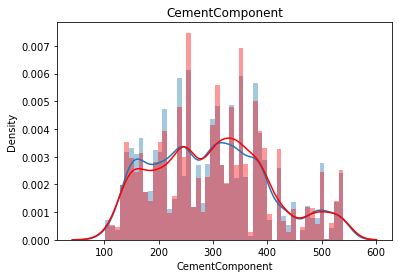

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


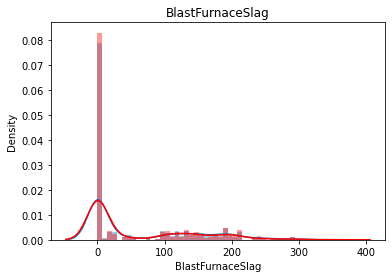

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


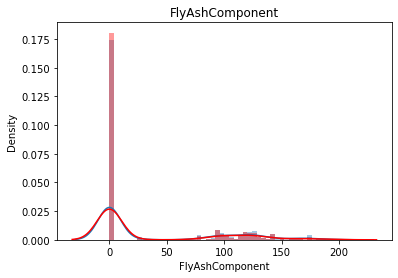

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


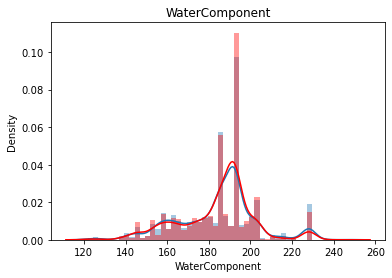

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


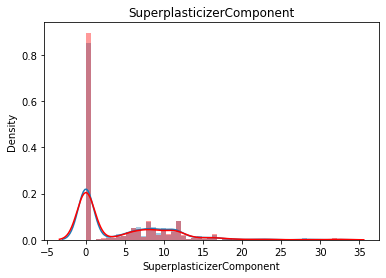

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


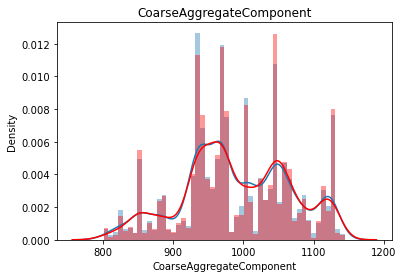

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


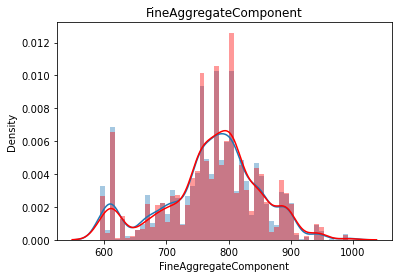

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


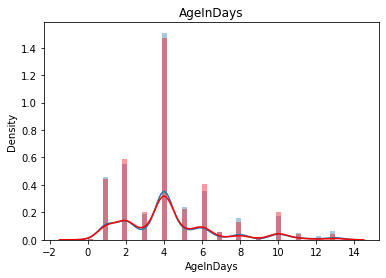

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


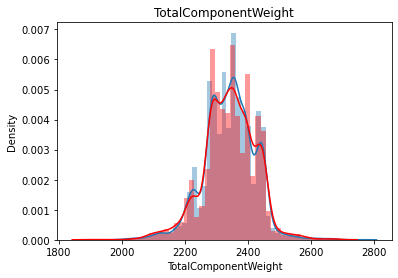

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


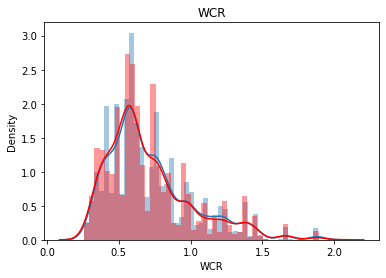

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


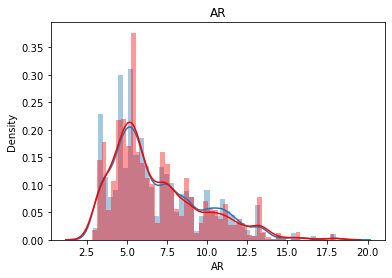

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


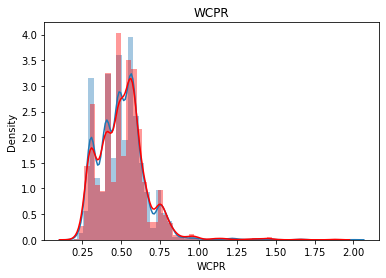

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


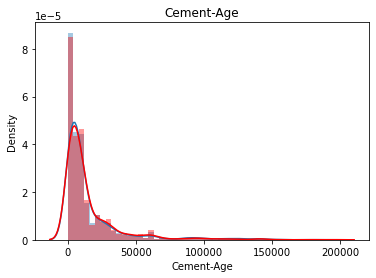

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


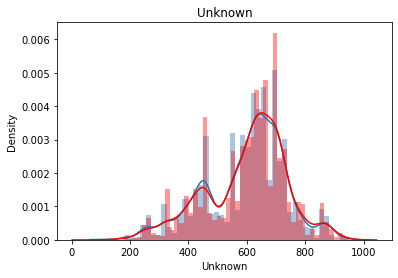

In [18]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [19]:
train = train.reset_index(drop=True)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [21]:
target = 'Strength'
features = [c for c in train.columns if c not in [target]]

In [45]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':15000,
'max_depth':6,
'early_stopping_rounds':200,
'learning_rate':0.01,
'one_hot_max_size':3,
'bootstrap_type':"MVS",
'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostRegressor(**params)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]

0:	learn: 16.3450136	test: 16.0122829	best: 16.0122829 (0)	total: 2.48ms	remaining: 37.2s


1it [00:01,  1.67s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.00299412
bestIteration = 840

Shrink model to first 841 iterations.
mse on fold 0: 121.0659
0:	learn: 16.3414343	test: 16.0492388	best: 16.0492388 (0)	total: 1.44ms	remaining: 21.6s


2it [00:03,  1.49s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.50702006
bestIteration = 702

Shrink model to first 703 iterations.
mse on fold 1: 132.4115
0:	learn: 16.2442665	test: 16.8929163	best: 16.8929163 (0)	total: 1.44ms	remaining: 21.7s
2000:	learn: 10.4111673	test: 11.3452335	best: 11.3450339 (1996)	total: 2.91s	remaining: 18.9s


3it [00:06,  2.37s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.34215248
bestIteration = 2090

Shrink model to first 2091 iterations.
mse on fold 2: 128.6444
0:	learn: 16.2918984	test: 16.4575475	best: 16.4575475 (0)	total: 1.36ms	remaining: 20.5s


4it [00:09,  2.52s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 10.92019477
bestIteration = 1644

Shrink model to first 1645 iterations.
mse on fold 3: 119.2507
0:	learn: 16.3022308	test: 16.3588846	best: 16.3588846 (0)	total: 1.37ms	remaining: 20.6s


5it [00:10,  1.94s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.79050558
bestIteration = 385

Shrink model to first 386 iterations.
mse on fold 4: 163.5970
0:	learn: 16.3365341	test: 16.0853447	best: 16.0853447 (0)	total: 1.69ms	remaining: 25.3s


6it [00:11,  1.81s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.34831015
bestIteration = 849

Shrink model to first 850 iterations.
mse on fold 5: 128.7841
0:	learn: 16.3124166	test: 16.3053919	best: 16.3053919 (0)	total: 1.35ms	remaining: 20.3s


7it [00:13,  1.76s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.61446311
bestIteration = 904

Shrink model to first 905 iterations.
mse on fold 6: 134.8958
0:	learn: 16.3151494	test: 16.2561301	best: 16.2561301 (0)	total: 1.49ms	remaining: 22.4s


8it [00:15,  2.03s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.96985269
bestIteration = 1565

Shrink model to first 1566 iterations.
mse on fold 7: 143.2774
0:	learn: 16.2626984	test: 16.7453808	best: 16.7453808 (0)	total: 1.61ms	remaining: 24.2s


9it [00:17,  1.89s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.80921956
bestIteration = 845

Shrink model to first 846 iterations.
mse on fold 8: 139.4577
0:	learn: 16.3491161	test: 15.9487927	best: 15.9487927 (0)	total: 1.94ms	remaining: 29.1s


10it [00:19,  1.91s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.52324907
bestIteration = 846

Shrink model to first 847 iterations.
mse on fold 9: 132.7853
mean mse across all folds: 134.4170


In [46]:
np.array(val_scores).mean()**(1/2)

11.593833308431407

In [47]:
models

In [52]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':200,
'max_depth':6,
#'early_stopping_rounds':200,
'learning_rate':0.01,
#'one_hot_max_size':3,
#'bootstrap_type':"MVS",
#'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = GradientBoostingRegressor(**params)
    
    model.fit(X_train, y_train)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

1it [00:02,  2.62s/it]

mse on fold 0: 126.5368


2it [00:05,  2.60s/it]

mse on fold 1: 138.7649


3it [00:07,  2.60s/it]

mse on fold 2: 137.5621


4it [00:10,  2.59s/it]

mse on fold 3: 126.0898


5it [00:12,  2.58s/it]

mse on fold 4: 166.0582


6it [00:15,  2.58s/it]

mse on fold 5: 132.2879


7it [00:18,  2.59s/it]

mse on fold 6: 138.5393


8it [00:20,  2.58s/it]

mse on fold 7: 147.9713


9it [00:23,  2.58s/it]

mse on fold 8: 144.0599


10it [00:25,  2.59s/it]

mse on fold 9: 135.0610
mean mse across all folds: 139.2931


In [70]:
np.array(val_scores).mean()**(1/2)

12.66868117832979

In [91]:
kf = KFold(n_splits = 10, random_state = 5, shuffle = True)
models = []
val_scores = []
preds = []

include_orig = True

xgb_params = {'n_estimators'     : 3000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.05,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 41,
              # 'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }
# xgb_params = {'max_depth': 3,
#  'learning_rate': 0.09457198987172621,
#  'min_child_weight': 9,
#  'gamma': 0.3126168664550514,
#  'subsample': 0.5585879695479943,
#  'colsample_bytree': 0.46793424854801835,
#  'reg_alpha': 0.21235299325212031,
#  'reg_lambda': 0.4236760707956293,
#  'n_estimators': 606}

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = XGBRegressor(**xgb_params)
    
    model.fit(X_train, y_train)
    
    models.append(model)
    pred = model.predict(X_val)
    # score = roc_auc_score(y_val, pred)
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'score on fold {i}: {score:.4f}')
    
print(f'mean score across all folds: {np.mean(val_scores):.4f}')

1it [00:04,  4.50s/it]

score on fold 0: 152.3097


2it [00:08,  4.45s/it]

score on fold 1: 160.3199


3it [00:13,  4.36s/it]

score on fold 2: 140.2740


4it [00:17,  4.42s/it]

score on fold 3: 154.3782


5it [00:21,  4.38s/it]

score on fold 4: 165.0598


6it [00:26,  4.35s/it]

score on fold 5: 154.7581


7it [00:30,  4.30s/it]

score on fold 6: 165.0972


8it [00:33,  4.00s/it]

score on fold 7: 152.6178


9it [00:36,  3.61s/it]

score on fold 8: 140.2845


10it [00:39,  3.92s/it]

score on fold 9: 160.0737
mean score across all folds: 154.5173


In [92]:
np.array(val_scores).mean()**(1/2)

12.4304986524579

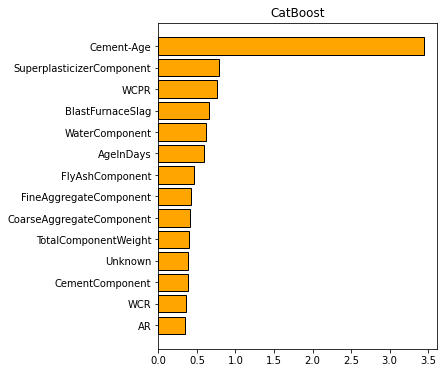

In [93]:
plt.figure(figsize = (5, 6))
cat_imp = np.zeros(len(models[0].feature_importances_))
for model in models[:10]:
    cat_imp += model.feature_importances_
    
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title("CatBoost")
plt.show()

In [90]:
models

[GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostin

In [84]:
cat_preds = []
for model in models[:10]:
    preds = model.predict(test[features])
    cat_preds.append(preds)

<AxesSubplot:ylabel='Frequency'>

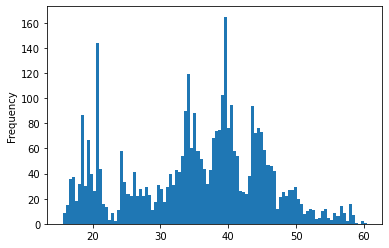

In [85]:
sub = pd.read_csv('./sample_submission.csv')
sub['Strength'] = np.array(cat_preds).mean(axis=0) #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sub['Strength'].plot.hist(bins=100)

In [ ]:
def cat_objective(trial):
    
    params_optuna = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
    }
    n=10
    cv = KFold(n,shuffle=True, random_state=42)
    all_scores = []
    for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
        X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
        X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target]

        model = CatBoostRegressor(**params_optuna)
        model.fit(X_train,
                  y_train,
                  eval_set = [(X_val,y_val)],
                  early_stopping_rounds=50,
                  verbose=500)

        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val,y_pred)
        all_scores.append(score)

    return np.mean(all_scores)

In [ ]:
# study = optuna.create_study(direction='maximize', sampler = TPESampler())
# study.optimize(func=cat_objective, n_trials=50)
# study.best_params

In [ ]:
# kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
# models = []
# val_scores = []
# preds = []

# params = study.best_params

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = CatBoostRegressor(**params)
    
#     model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
#     models.append(model)
#     # pred = model.predict_proba(X_val)[:,1]
#     # score = accuracy_score(y_val, model.predict(X_val))
#     score = mean_squared_error(y_val, model.predict(X_val))

#     val_scores.append(score)
    
#     print(f'mse on fold {i}: {score:.4f}')
    
# print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

In [ ]:
# np.array([i**(1/2) for i in val_scores]).mean()

> grad : underfit

> cat : overfit